# I. What drives the homogenization/heterogenization of music?

In the previous notebook (check_horkheimer), I found that while Horkheimer was right in that different and successful songs had many imitators, there was not strong evidence that genres became more specific as time went on. 

Instead of Horkheimer's theory of homogenization, I propose that there is a constant cycle of homogenization and heterogenization of music as a result of the constant tension between the dominant culture and subcultures. My general framework for understanding this tension comes from Hebdige's *Subculture: The Meaning of Style*. What specific trends catch on depends on the circuit of production, similar to the design of the Sony Walkman as outlined by DuGay et. al. in Chapter 2 of *Doing Cultural Studies*, and the process of commodification is an argument, as defined by ADSFAJKDL;FDSJKA;. The pattern of how trends spread follows the pattern of complex contagions, as described by Guilbeault et al in "Complex Contagions: A Decade in Review".

<!-- Hebdige -->
In *Subcultures: The Meaning of Style*, Hebdige criticizes how structural Marxism explains the reproduction of structures, but has no explanation for change. Hebdige defines style in subculture as gestures that challenge the cohesion of dominant culture. He uses the punk aesthetic as an example of a subculture that represented the white working class British youth as a response to the social unease in the post-war period. Out of objects such as safety pins, which were used to hold clothes together, it created "tokens of a self-imposed exile" (Hebdige 2). However, the image of social cohesion is maintained through the appropriation and redefinition of cultures of resistance. Thus, punk style was commodified and labelled as both trivial and a spectacle: "Youth cultural styles may begin by issuing symbolic challenges, but they must inevitably end by establishing new sets of conventions" (Hebidge 96).

Hebdige's explanation of subcultures can be generalized from subcultures that directly challenge the cohesion of dominant culture to cultures that are "other". Here, we consider Korean pop music as an example, since it became a trend recently, so data on its popularity is more accesible than the punk aesthetic. Similar to how safety pins were appropriated and commodified outside of the original subculture, the subculture of Korean culture has been commodified in the US. 

Thus, my theory agrees with Horkehimer that "anyone who resists can survive only by being incorporated" (Horkheimer 104) through the commodification of subcultures. However, since there is a constant tension between hegemony and subcultures, I disagree that the wheel spins in place. Rather, the wheel travels subcultures. The process of commodification defuses the subculture's subversive power, and its innovations are fed back to mainstream culture (Hebidge 95). Thus, as subcultures become part of the dominant culture, they are influenced by the next subculture, so genres do not converge to a formula.

<!-- duGay -->
Additionally, while Horkheimer believes that culture is produced from the top-down, I argue that it is created and inspired through a bottom-up process. Using the circuit of production to analyze Hebdige reveals this relationship clearly. Before commodification, subcultures originate with oppressed groups, such as the white working class or Black American youth. Signifiers such as safety pins or AAVE are backed-up by the identity of these oppressed groups. Safety pins serve a functional purpose for the working class community, and AAVE comes from the linguistic history of Black Americans. Similar to how the design of the Walkman was limited by the budget of the target audience (DuGay 48), the objects that become sign-vehicles are influenced by the environment of the oppressed group. In the process of commodification, producers interpret the subculture as "cool", which targets their consumers. Through this exchange, the interpretant of oppressed community is changed to "coolness", which results in the ideology of the subculture becoming disconnected from the sign-vehicles. Thus, people who don't come from the working class or historically Black communities adopt signs such as safety pins or AAVE to legitimize their identity as "cool".

<!-- Guilbeault -->
The process of a subculture to catch on follows the model of a complex contagion, as described by Guilbeault et al in "Complex Contagions: A Decade in Review". A simple contagion only requires a single activated source for transmission, while complex contagions require multiple sources of activation, such as behaviors, beliefs, or attitudes (Guilbeault 4). Since subcultures are a behavior, they should act like a complex contagion, meaning they grow slowly at first, and then explode.

In [106]:
import importlib
import music
importlib.reload(music)

import access
# from access import *
importlib.reload(access)

<module 'access' from 'c:\\Users\\grace\\Desktop\\macs_404_patterns\\music_trends\\access.py'>

In [152]:
import youtube_dl
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import lyricsgenius
import requests
from rauth import OAuth2Service

import re
import json
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# II. Get data

### From spotify

In [6]:
client_credentials_manager = SpotifyClientCredentials(client_id = access.spotify_client_id, client_secret = access.spotify_client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

r = requests.post('https://accounts.spotify.com/api/token',
data ={'grant_type': 'client_credentials'},auth=(access.client_id, access.client_secret))
bearer = dict(r.json())['access_token']

In [5]:
categories_df = pd.DataFrame(sp.categories(limit=50)['categories']['items'])
np.array(categories_df['name'])

array(['Top Lists', 'Hip-Hop', 'Pop', 'Country', 'Latin', 'Rock',
       'Summer', 'Workout', 'R&B', 'Dance/Electronic', 'Netflix', 'Indie',
       'Mood', 'Sleep', 'Christian & Gospel', 'Regional Mexican',
       'Wellness', 'Chill', 'EQUAL', 'Gaming', 'Frequency', 'Pride',
       'Kids & Family', 'Party', 'Decades', 'Fresh Finds', 'Jazz',
       'Focus', 'Romance', 'Folk & Acoustic', 'K-Pop', 'Instrumental',
       'Sports', 'Ambient', 'Alternative', 'In the car', 'theLINER',
       'Classical', 'Soul', 'Spotify Singles', 'Cooking & Dining', 'Punk',
       'Pop culture', 'Blues', 'Desi', 'Arab', 'RADAR', 'Student',
       'Anime', 'Tastemakers'], dtype=object)

In [7]:
r = requests.get('https://api.spotify.com/v1/recommendations/available-genre-seeds', headers={'Authorization': 'Bearer ' + bearer})
all_genres = set(r.json()['genres'])
hottopic_genres = ['rock','garage','hip-hop','k-pop','metal','punk','emo','anime']
# k-pop not included bc can't differentiate btwn interest in south korea and in US (where it would have started as "alternative"/subculture)

In [9]:
genre_dict = {}
for genre in hottopic_genres:
    # genre_dict[genre] = pd.DataFrame()
    # for year in range(1960,2022):
    #     year_df = music.spotify_query(genre,year)
    #     print(genre, year)
    #     genre_dict[genre] = pd.concat([genre_dict[genre],year_df])
    # genre_dict[genre] = music.get_audio_features(genre_dict[genre])
    # genre_dict[genre].to_csv(f'subculture_music\{genre}.csv')
    genre_dict[genre] = pd.read_csv(f'pt2_files\subculture_music\{genre}.csv', index_col=0)

In [136]:
vars_audio = ['speechiness','acousticness','instrumentalness','tempo','liveness','energy','danceability','loudness']

standarized_dict = {}
for genre in hottopic_genres:
    standarized_dict[genre] = genre_dict[genre][vars_audio].copy().dropna()
    for var in vars_audio:
        standarized_dict[genre][var] = (standarized_dict[genre][var] - standarized_dict[genre][var].mean()) / standarized_dict[genre][var].std()
    standarized_dict[genre]['year'] = genre_dict[genre]['year']

In [73]:
# subculture_df = pd.DataFrame()
# for genre in hottopic_genres:
#     genre_df = genre_dict[genre].copy()
#     genre_df['genre'] = genre
#     subculture_df = pd.concat([subculture_df,genre_df])
# subculture_df.to_csv('pt2_files\subculture_df.csv')
subculture_df = pd.read_csv('pt2_files\subculture_df.csv', index_col=0)
subculture_df.head()

,artist_name,track_name,popularity,track_id,release_date,year,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,genre
uri,,,,,,,,,,,,,,,,,,,,,
spotify:track:2x6pbpjVGjiWCcH89IK8AX,Neil Sedaka,Breaking Up Is Hard to Do,56.0,2x6pbpjVGjiWCcH89IK8AX,1960-12-30,1960,0.743,0.799,8,-5.466,...,0.0635,0.965,116.112,audio_features,2x6pbpjVGjiWCcH89IK8AX,https://api.spotify.com/v1/tracks/2x6pbpjVGjiW...,https://api.spotify.com/v1/audio-analysis/2x6p...,139200,4,rock
spotify:track:2OCoH12t6olzx9bT1PEC8F,Chuck Berry,Let It Rock - Single Version,56.0,2OCoH12t6olzx9bT1PEC8F,1960-01-01,1960,0.632,0.716,10,-12.387,...,0.1810,0.935,164.851,audio_features,2OCoH12t6olzx9bT1PEC8F,https://api.spotify.com/v1/tracks/2OCoH12t6olz...,https://api.spotify.com/v1/audio-analysis/2OCo...,102800,4,rock
spotify:track:7ItZM6DMZE2m1X7yIaRxjq,Eddie Cochran,C’Mon Everybody,58.0,7ItZM6DMZE2m1X7yIaRxjq,1960-05-01,1960,0.627,0.700,3,-9.657,...,0.1880,0.856,175.330,audio_features,7ItZM6DMZE2m1X7yIaRxjq,https://api.spotify.com/v1/tracks/7ItZM6DMZE2m...,https://api.spotify.com/v1/audio-analysis/7ItZ...,118227,4,rock
spotify:track:7B2pUwzvlbNG9D855r9ugf,The Ventures,"Walk, Don't Run - Stereo",49.0,7B2pUwzvlbNG9D855r9ugf,1960-01-01,1960,0.488,0.648,5,-13.252,...,0.1300,0.949,156.350,audio_features,7B2pUwzvlbNG9D855r9ugf,https://api.spotify.com/v1/tracks/7B2pUwzvlbNG...,https://api.spotify.com/v1/audio-analysis/7B2p...,122933,4,rock
spotify:track:1BIGqqQxGV9c45heFmUxLL,Sam Cooke,That's Where It's At,50.0,1BIGqqQxGV9c45heFmUxLL,1960-01-01,1960,0.516,0.450,0,-9.318,...,0.1970,0.647,100.208,audio_features,1BIGqqQxGV9c45heFmUxLL,https://api.spotify.com/v1/tracks/1BIGqqQxGV9c...,https://api.spotify.com/v1/audio-analysis/1BIG...,155320,3,rock


### From genius

In [62]:
genius = OAuth2Service(client_id=access.genius_client_id, client_secret=access.genius_client_secret, name='genius', authorize_url='https://api.genius.com/oauth/authorize', access_token_url='https://api.genius.com/oauth/token', base_url='https://api.genius.com/')
genius = lyricsgenius.Genius(access.genius_access_token)
genius.verbose = False
genius.remove_section_headers = True

In [71]:
# cardigan = genius.search_song('cardigan', 'taylor swift').lyrics
cardigan[cardigan.find('Lyrics')+7:].replace('\n',' ')

"Vintage tee, brand new phone High heels on cobblestones When you are young, they assume you know\u2005nothing Sequin\u2005smile, black lipstick Sensual\u2005politics When you are young, they assume\u2005you know nothing  But I knew you Dancin' in your Levi's Drunk under a streetlight, I I knew you Hand under my sweatshirt Baby, kiss it better, I And when I felt like I was an old cardigan Under someone's bed You put me on and said I was your favorite  A friend to all is a friend to none Chase two girls, lose the one When you are young, they assume you know nothing  But I knew you Playing hide-and-seek and Giving me your weekends, I I knew you Your heartbeat on the High Line Once in twenty lifetimes, I  And when I felt like I was an old cardigan Under someone's bed You put me on and said I was your favorite  To kiss in cars and downtown bars Was all we needed You drew stars around my scars But now I'm bleedin' See Taylor Swift LiveGet tickets as low as $325You might also like 'Cause I k

# III. Analysis

If my theory is true, we should 

## spotify data

#### by popularity

In [82]:
by_popularity = pd.DataFrame(subculture_df.groupby(['genre','year'])['popularity'].mean())

In [125]:
# find when each genre first had a popularity score above 20
first_above_20 = {}
for genre in hottopic_genres:
    first_above_20[genre] = by_popularity.loc[genre][by_popularity.loc[genre].rolling(5).mean()['popularity'] > 21].index[0]
order = pd.DataFrame({'genre':first_above_20.keys(), 'year':first_above_20.values()}).sort_values('year').reset_index(drop=True)
hottopic_genres = list(order['genre'])
order

,genre,year
0,rock,1966
1,metal,1987
2,hip-hop,1995
3,punk,1996
4,k-pop,2010
5,emo,2012
6,garage,2014
7,anime,2014


Text(0, 0.5, 'Spotify Popularity Score')

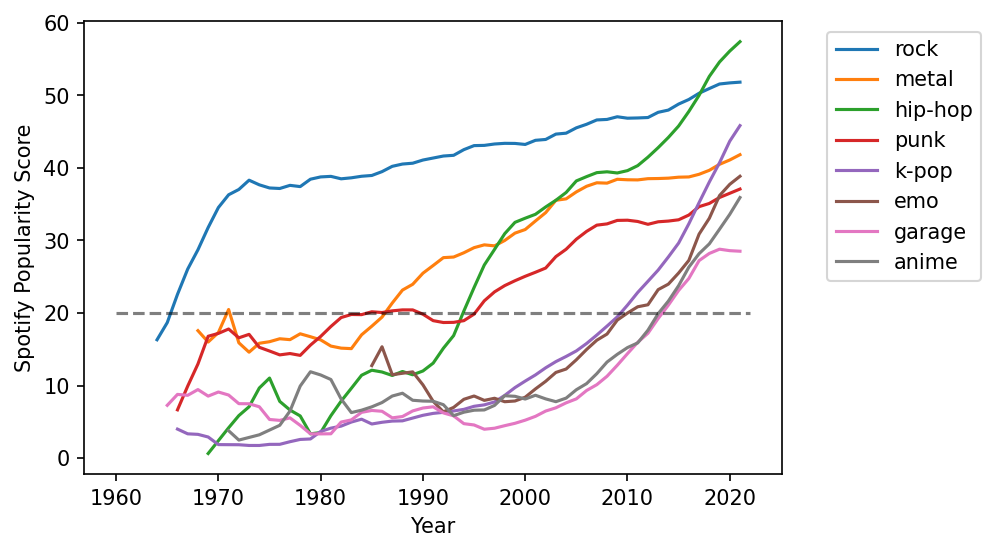

In [95]:
for genre in hottopic_genres:
    plt.plot(by_popularity.loc[genre].rolling(5).mean(), label=genre)
plt.plot([1960,2022],[20,20], linestyle='--', color='black',alpha=0.5)
# 20 is when a song is pushed to users that aren't already following the artist https://lodgecove.com/what-is-the-spotify-popularity-index/
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('Year')
plt.ylabel('Spotify Popularity Score')

### by releases per year

In [25]:
by_count = pd.DataFrame(subculture_df.groupby(['genre','year'])['id'].count())

# find when each genre first had a count of 1000
first_maxed = {}
for genre in hottopic_genres:
    first_maxed[genre] = by_count.loc[genre][by_count.loc[genre].rolling(5).mean()['id'] >= 999].index[0]

# subtract the first year each genre had a count of 1000 from the first column of by_count
by_count['first_maxed'] = by_count.index.get_level_values(1) - by_count.index.get_level_values(0).map(first_maxed)
# by_count = by_count.drop_duplicates()

Text(0.5, 0, 'year')

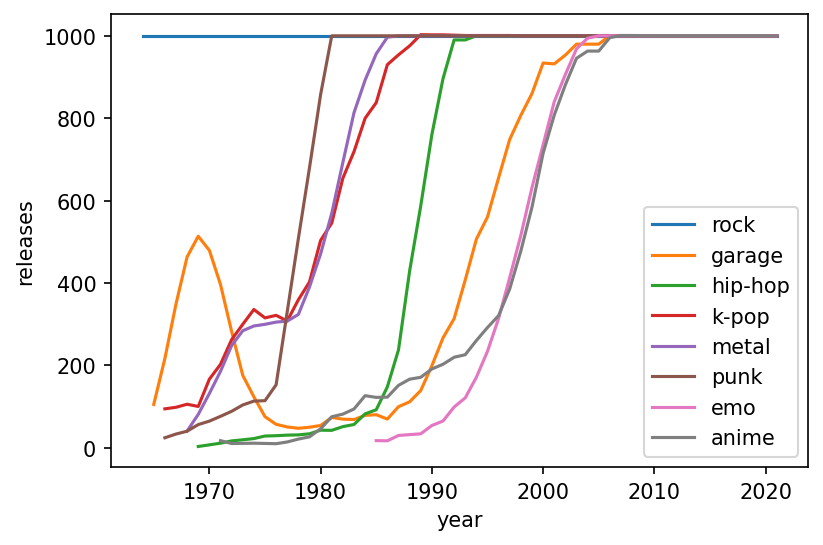

In [114]:
tracks_by_year = {}
for genre in genre_dict.keys():
    tracks_by_year[genre] = genre_dict[genre].groupby('year').count()['id']
    tracks_by_year[genre].rolling(5).mean().plot(label=genre)
plt.legend()
plt.ylabel('releases')
plt.xlabel('year')

In [76]:
pd.DataFrame({'genre':first_maxed.keys(), 'year':first_maxed.values()}).sort_values('year')

,genre,year
0,rock,1964
5,punk,1981
4,metal,1987
3,k-pop,1989
2,hip-hop,1994
6,emo,2005
1,garage,2006
7,anime,2007


In [20]:
complex_contagion = music.full_simulate_net_diffusion()
complex_contagion['relative'] = complex_contagion['Execution'] - complex_contagion['Execution'][np.argmax(complex_contagion['Infected'])]
complex_contagion = complex_contagion.groupby('Execution')['Infected'].mean().reset_index()
complex_contagion['Infected'] = (complex_contagion['Infected']  / max(complex_contagion['Infected'])) * 1000

In [31]:
complex_contagion['relative'] = complex_contagion['Execution'] - complex_contagion['Execution'][np.argmax(complex_contagion['Infected'])]
complex_contagion['relative'] = complex_contagion['relative'] * 7
complex_contagion = complex_contagion[:np.argmax(complex_contagion['Infected'])+1]

Text(0, 0.5, 'releases')

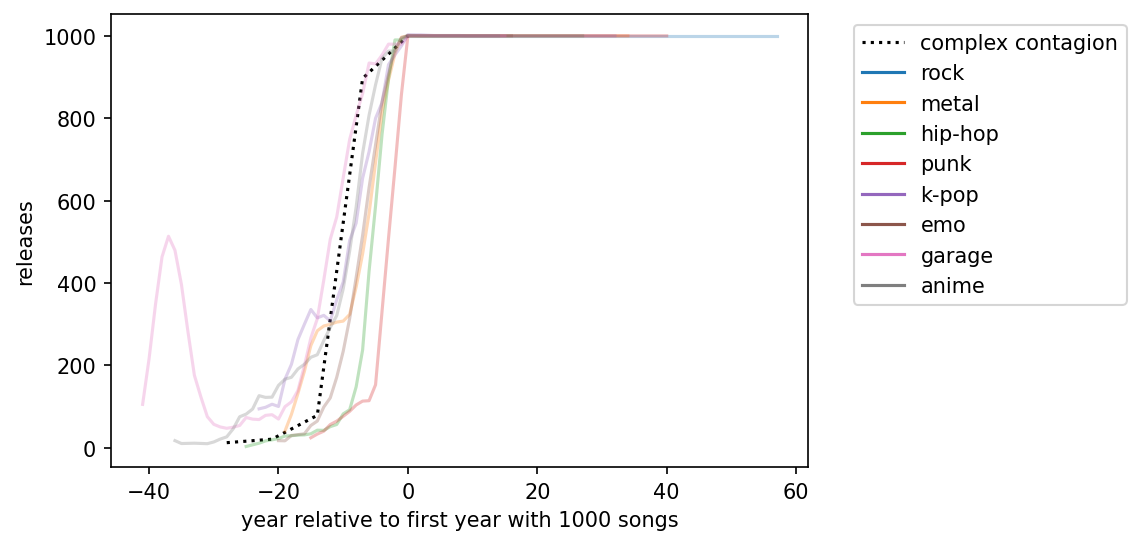

In [107]:
plt.plot(complex_contagion['relative'], complex_contagion['Infected'], label='complex contagion', color='black',linestyle=':')
for genre in hottopic_genres:
    plt.plot(by_count.loc[genre]['first_maxed'], by_count.loc[genre]['id'].rolling(5).mean(), label=genre, alpha=0.3)
# sns.lineplot(x='Execution', y='Infected', data=complex_contagion, label='Simulated Results', color='black')
leg = plt.legend(bbox_to_anchor=(1.05, 1))
for l in leg.legendHandles:
    l.set_alpha(1)
leg
plt.xlabel('year relative to first year with 1000 songs')
plt.ylabel('releases')

In [137]:
by_genre = {}
for genre in hottopic_genres:
    by_genre[genre] = standarized_dict[genre]

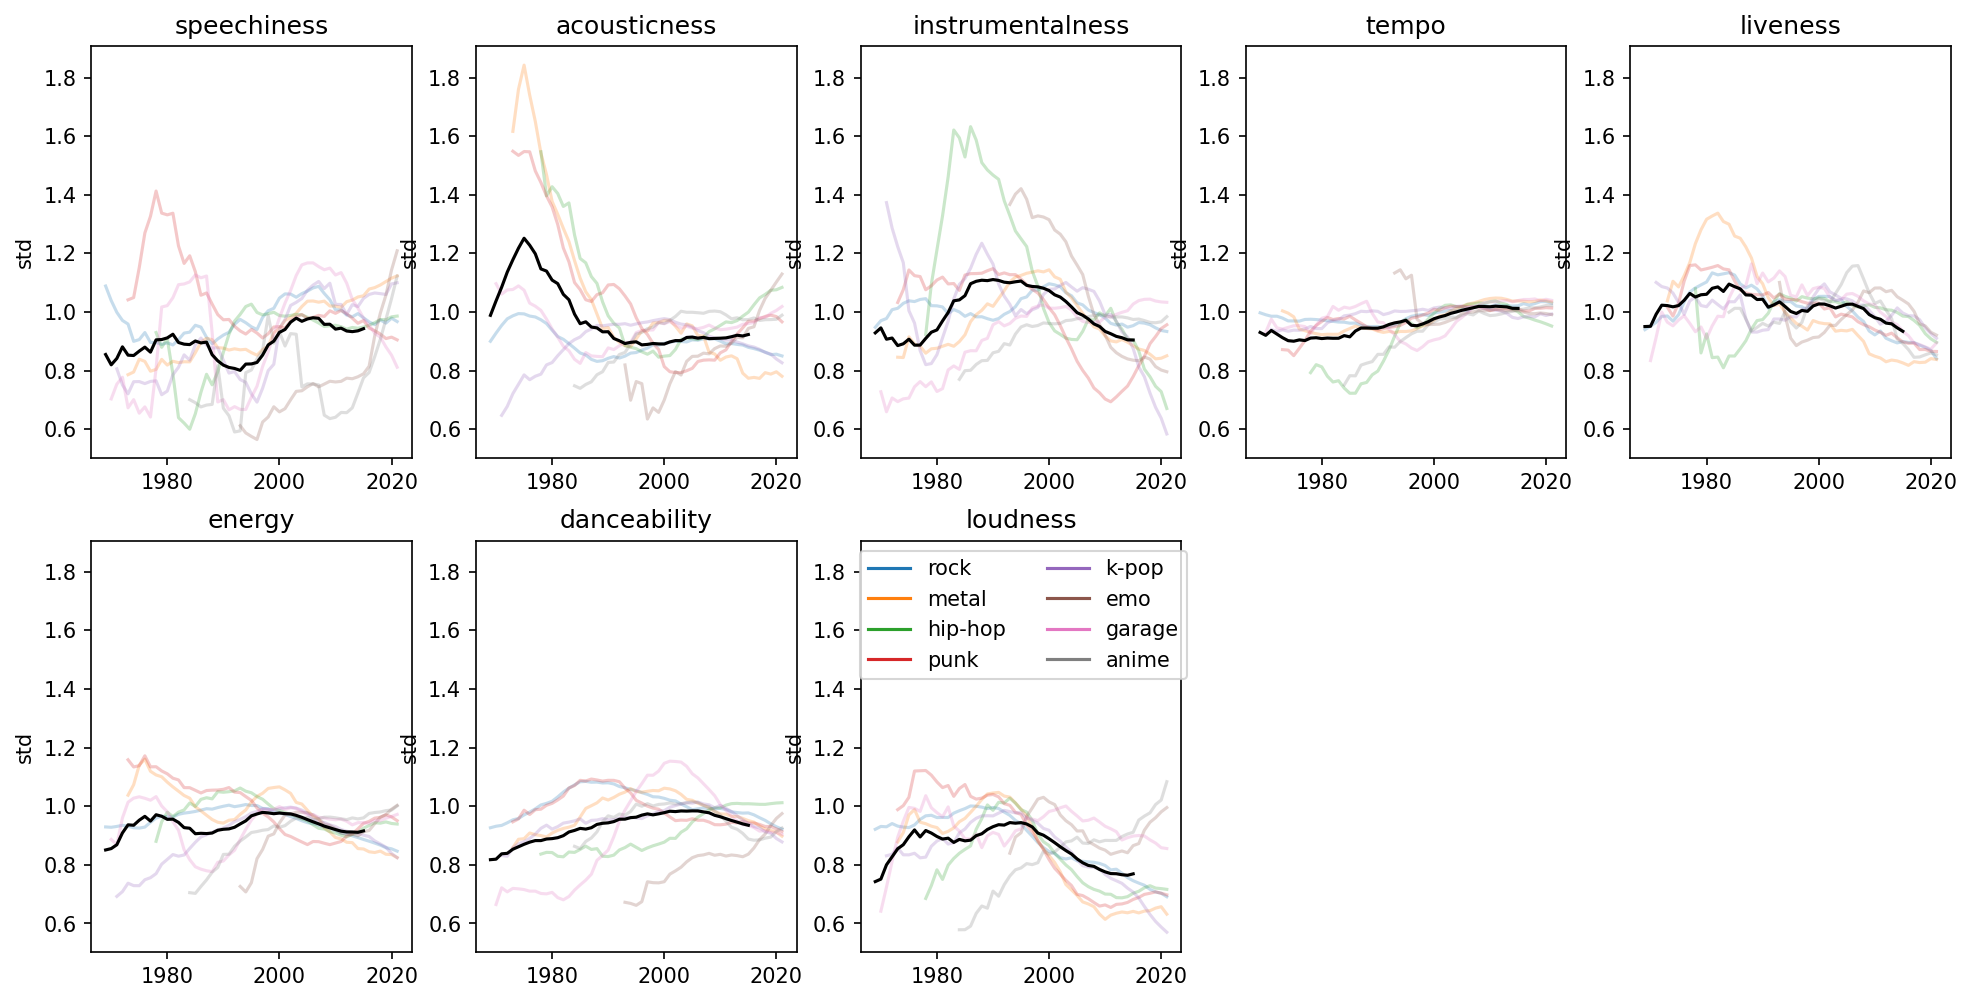

In [138]:
music.plot_numerical_std(vars_audio, hottopic_genres, by_genre, legend=True)

### are subcultures influenced by each other?

In [117]:
by_genre['rock'].head(2)

,artist_name,track_name,popularity,track_id,release_date,year,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,genre
uri,,,,,,,,,,,,,,,,,,,,,
spotify:track:2x6pbpjVGjiWCcH89IK8AX,Neil Sedaka,Breaking Up Is Hard to Do,56.0,2x6pbpjVGjiWCcH89IK8AX,1960-12-30,1960,1.318035,0.394177,8,0.593402,...,-0.864291,0.965,-0.283672,audio_features,2x6pbpjVGjiWCcH89IK8AX,https://api.spotify.com/v1/tracks/2x6pbpjVGjiW...,https://api.spotify.com/v1/audio-analysis/2x6p...,139200,4,rock
spotify:track:2OCoH12t6olzx9bT1PEC8F,Chuck Berry,Let It Rock - Single Version,56.0,2OCoH12t6olzx9bT1PEC8F,1960-01-01,1960,0.683315,0.029489,10,-1.132415,...,-0.210648,0.935,1.326607,audio_features,2OCoH12t6olzx9bT1PEC8F,https://api.spotify.com/v1/tracks/2OCoH12t6olz...,https://api.spotify.com/v1/audio-analysis/2OCo...,102800,4,rock


In [144]:
original_years = {}
for i in order.index[:-1]:
    g = order['genre'][i]
    original_years[g] = (min(by_genre[g].year),order['year'][i+1])
for g in ['k-pop','emo','garage','anime']: # genres that become popular recently
    original_years[i] = (min(by_genre[g].year),2022)
original_years

{'rock': (1960, 1987),
 'metal': (1964, 1995),
 'hip-hop': (1961, 1996),
 'punk': (1961, 2010),
 'k-pop': (1962, 2022),
 'emo': (1961, 2022),
 'garage': (1961, 2022),
 'anime': (1966, 2022)}

In [150]:
pca_genres, pca_reconstruct = {}, {}
for genre in hottopic_genres:
    start,end = original_years[genre]
    df = standarized_dict[genre].query(f'year >= {start} & year <= {end}')
    pca = PCA(0.95)
    pca.fit(df[vars_audio])

    current_pca = pca.transform(standarized[vars_audio])
    current_reconstruct = pca.inverse_transform(current_pca)
    # current_reconstruct_err = np.linalg.norm(standarized[vars_audio] - current_reconstruct, axis=1)
    pca_reconstruct[genre] = current_reconstruct


In [156]:
compare = standarized.copy()
for genre in hottopic_genres:
    compare['similarity_'+genre] = cosine_similarity(standarized[vars_audio], pca_reconstruct[genre]).flatten()

MemoryError: Unable to allocate 772. GiB for an array with shape (321942, 321942) and data type float64

In [ ]:
compare_dict = {}
for genre in hottopic_genres:
    basis = pca_genres[genre]
    for genre in hottopic_genres:
        compare_df = standarized_dict[genre]
        compare_df['similarity']

In [148]:
# compared to hip-hop
i = 1
for genre in ['rock','metal']: # before hip-hop
    

# for genre in ['punk','k-pop','emo','garage','anime']: # after hip-hop
#     plt.plot(pca_genres[genre][:,0], pca_genres[genre][:,i], label=genre)

array([[ 0.20384886, -1.81436769,  0.62912869, ...,  0.19129624,
        -0.29403063, -1.80278084],
       [ 0.06714601, -0.11994502,  0.21687907, ...,  0.56912921,
        -1.14713202, -0.42492136],
       [ 1.19804146, -0.54510444, -0.20806716, ...,  0.22701328,
        -1.27121216,  0.31690549],
       ...,
       [ 2.70988563,  0.11256342,  0.09651174, ..., -0.6757967 ,
        -0.86815581, -0.15125667],
       [ 0.15624308, -1.12746805, -0.11593168, ...,  0.12140988,
        -0.31497826,  1.21628816],
       [-0.11939181, -0.9262849 , -0.30154817, ...,  0.1400725 ,
         0.05887414,  1.07633712]])

In [ ]:
# build a PCA for the past years, find a song whos vector does not fit well into the existing PCA
all_reconstruct_err = []
for i in range(1960, 2016): # need ten years to start w
    past_df = standarized[['year','pos']+numerical].query('year < @i')
    pca = PCA(0.95)
    pca.fit(past_df[numerical])
    # print(i, sum(pca.explained_variance_ratio_), pca.n_components_)

    current_df = standarized.query('year == @i')#.query('pos < 10')
    current_pca = pca.transform(current_df[numerical])
    current_reconstruct = pca.inverse_transform(current_pca)
    current_reconstruct_err = np.linalg.norm(current_df[numerical] - current_reconstruct, axis=1)
    all_reconstruct_err.extend(current_reconstruct_err)
# find what residuals stand out
plt.boxplot(all_reconstruct_err)
np.percentile(all_reconstruct_err, 90)